### Due to the severity of this real-world crisis, what information would be the most important one to "machine learn"? Can it be learned?

It is important to know who is committing suicide. With that in mind, we need to examine the age groups, demography, and wealth to scratch the surface of this pandemic. I think that this dataset does just that, however, there may be other factors at play that contribute to suicides that are not represented here. The dataset may have enough data to solve the question if it can be learned. Later experiments will likely show that suicide rates and their implication can be learned to some extent.

***

### In detail how should one set up the problem? Would it be a regression or a classification problem? Any unsupervised approach to see some patterns exist or not?

The following can be applied to this data:

- The data should be cleaned to remove all missing and/or uknown variables.
- Derived data should be excluded, such as country-year.
- Clustering can be done for feature extraction, 
- Feature correlation can be applied to see what a possible dependent variable is.
- Feature reduction can be applied to weed out features that may hinder training.
- The answer whether it is a classification problem vs regression problem will be found by performing the last three bullet points. If it is found that the dependent variable is continous, then regression will be used, otherwise classification will be used. 

***

### What should be the dependent variable?

In [1]:
##imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##get current working directory
cwd = os.getcwd()

##get data path and open as a pandas dataframe
data_path = cwd + '\\data\\master_preproc.csv'
df = pd.read_csv(data_path)

In [2]:
##take a closer look at the data
df.describe()

,year,sex,suicides_no,population,gdp_for_year,gdp_per_capita,generation_encoded
count,27820.000000,27820.000000,27820.000000,2.782000e+04,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,1.500000,242.574407,1.844794e+06,4.455979e+11,16866.464414,3.701869
std,8.469055,0.500009,902.047917,3.911779e+06,1.453907e+12,18887.576472,1.809836
min,1985.000000,1.000000,0.000000,2.780000e+02,4.691962e+07,251.000000,1.000000
25%,1995.000000,1.000000,3.000000,9.749850e+04,8.985353e+09,3447.000000,2.000000
50%,2002.000000,1.500000,25.000000,4.301500e+05,4.811469e+10,9372.000000,3.000000
75%,2008.000000,2.000000,131.000000,1.486143e+06,2.600000e+11,24874.000000,5.000000
max,2016.000000,2.000000,22338.000000,4.380521e+07,1.810000e+13,126352.000000,6.000000


In [3]:
##look at feature correlation 
df.corr()

,year,sex,suicides_no,population,gdp_for_year,gdp_per_capita,generation_encoded
year,1.000000e+00,-4.369174e-17,-0.004546,0.008850,9.451141e-02,3.391343e-01,2.683006e-01
sex,-4.369174e-17,1.000000e+00,0.144629,-0.011242,1.209552e-15,3.966174e-16,-9.490607e-18
suicides_no,-4.545958e-03,1.446292e-01,1.000000,0.616162,4.300673e-01,6.132975e-02,-7.062371e-02
population,8.850170e-03,-1.124208e-02,0.616162,1.000000,7.106923e-01,8.150986e-02,-6.796261e-02
gdp_for_year,9.451141e-02,1.209552e-15,0.430067,0.710692,1.000000e+00,3.033556e-01,2.125785e-02
gdp_per_capita,3.391343e-01,3.966174e-16,0.061330,0.081510,3.033556e-01,1.000000e+00,8.289921e-02
generation_encoded,2.683006e-01,-9.490607e-18,-0.070624,-0.067963,2.125785e-02,8.289921e-02,1.000000e+00


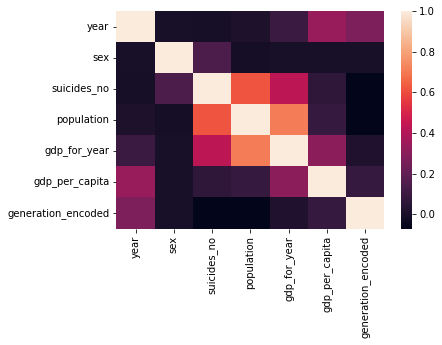

In [4]:
corr_plot = sns.heatmap(df.corr())

__Dependent Variable__: The dependent variable is suicide genaration.

***

### Rank the variables to find some strong correlations between the independent variables and the dependent variable you decided.


Using seaborn to visualize the heatmap derived from pandas correlation function, it can be seen that the correlations in descending order are:

Positive correlation rankings:
1. Year
2. Gdp_per_capita
3. GDP_for_year

Negative correlation rankings:
1. suicide_no
2. population
3. sex

***

### Pre-process the dataset and list the major features you want to use. Note that not all features are crucial. For example, country-year variable is a derived feature and for a classifier it would not be necessary to include the year, the country and the country-year together. In fact, one must avoid adding a derived feature and the original at the same time.List the independent features you want to use.

The preprocess step was done in excel for simplicity. Country-year, 
and suicides/100k features were removed since they were derived solely on the data. Age was also removed, because there were the same number of age groups as unique generation names. HDI_for_year was also removed, because that data was not consistently collected and was missing a significant amount of values. 

Generation names and sex were encoded as counting numbers to sidestep more complicated encoding methods. Along the same logic, country was deleted form the dataset to sidestep encoding hundreds of country names.

The data was normalized using scikit-learn's preprocess library. Finally, the data was spit into a trainset, testset, and validation set prior to training.


***

### Devise a classifier for this dataset and present a first trial model. Note that we will continue to this problem in the following modules.

In [5]:
##get X, y values from dataframe
y = df.sex
target_names = list(set(list(df.sex)))
df.drop("suicides_no", axis='columns', inplace=True)
X = df.values

##normalize data prior to split
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)  # fit does nothing.
X = transformer.transform(X)

##split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
##train Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, verbose=True)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomForestClassifier(verbose=True)

In [7]:
##get predictions
y_pred = rf.predict(X_test)

##evaluate model
from sklearn.metrics import classification_report
y_pred = list(y_pred)
print('Test Accuracy : %.3f'%(y_pred == y_test).mean())

Test Accuracy : 0.485


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


__dependent variables tested__
 - generation: 0.303 accuracy
 - sex: 0.48

Note: Though sex has the highest accuracy score, that is misleading, because there are only two unique sex values (male and female), whereas generation has six, make it a better dependent variable for classification.